In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

inditex = df[df['empresa'] == 'Inditex']

inditex.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

inditex = inditex [['date','open','high','low','close','adj close']]

inditex.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

inditex['date'] = pd.to_datetime(inditex['date'], format="%Y-%m-%d")

inditex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 24525 to 25849
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

inditex.sort_values(by='date',ascending= True, inplace=True)

inditex.head()

,date,open,high,low,close,adj close
24961,2019-01-02,22.160000,22.510000,21.850000,22.430000,19.821806
24962,2019-01-03,22.309999,22.420000,22.110001,22.110001,19.539015
24963,2019-01-04,22.330000,22.959999,22.309999,22.889999,20.228313
24855,2019-01-07,23.000000,23.080000,22.690001,23.070000,20.387383
24964,2019-01-08,23.129999,23.950001,23.110001,23.570000,20.829243


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

inditex = inditex[(inditex['date'] >= fecha_inicio) & (inditex['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

inditex.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=inditex['date'].min(), end=inditex['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

inditex = inditex.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

inditex = inditex.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

inditex.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,26.430000,26.430000,25.709999,25.840000,23.776091
1,2021-01-05,25.700001,25.969999,25.510000,25.750000,23.693275
2,2021-01-06,25.920000,26.480000,25.530001,26.400000,24.291357
3,2021-01-07,26.570000,26.570000,25.930000,26.230000,24.134935
4,2021-01-08,26.500000,26.719999,26.340000,26.719999,24.585798
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,26.570000,26.700001,26.129999,26.219999,24.125736
8,2021-01-12,26.299999,26.549999,26.059999,26.110001,24.024521
9,2021-01-13,26.160000,26.200001,25.410000,25.780001,23.720881


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

inditex = inditex.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


inditex.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,26.430000,26.430000,25.709999,25.840000,23.776091
1,2021-01-05,25.700001,25.969999,25.510000,25.750000,23.693275
2,2021-01-06,25.920000,26.480000,25.530001,26.400000,24.291357
3,2021-01-07,26.570000,26.570000,25.930000,26.230000,24.134935
4,2021-01-08,26.500000,26.719999,26.340000,26.719999,24.585798
5,2021-01-09,26.500000,26.719999,26.340000,26.719999,24.585798
6,2021-01-10,26.500000,26.719999,26.340000,26.719999,24.585798
7,2021-01-11,26.570000,26.700001,26.129999,26.219999,24.125736
8,2021-01-12,26.299999,26.549999,26.059999,26.110001,24.024521
9,2021-01-13,26.160000,26.200001,25.410000,25.780001,23.720881


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

inditex = inditex.set_index('date')

inditex.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,26.430000,26.430000,25.709999,25.840000,23.776091
2021-01-05,25.700001,25.969999,25.510000,25.750000,23.693275
2021-01-06,25.920000,26.480000,25.530001,26.400000,24.291357
2021-01-07,26.570000,26.570000,25.930000,26.230000,24.134935
2021-01-08,26.500000,26.719999,26.340000,26.719999,24.585798
2021-01-09,26.500000,26.719999,26.340000,26.719999,24.585798
2021-01-10,26.500000,26.719999,26.340000,26.719999,24.585798
2021-01-11,26.570000,26.700001,26.129999,26.219999,24.125736
2021-01-12,26.299999,26.549999,26.059999,26.110001,24.024521


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

inditex.index = pd.DatetimeIndex(inditex.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

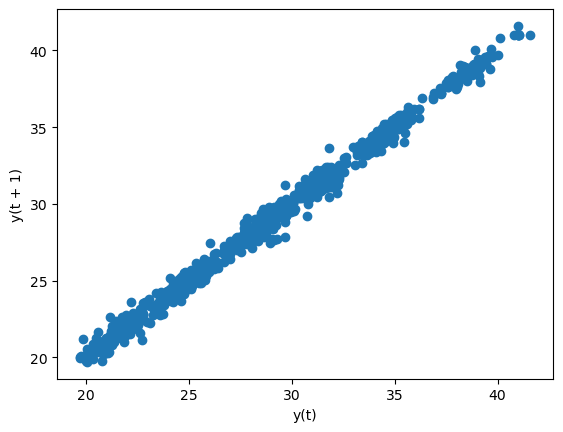

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(inditex.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = inditex.close[:-10], inditex.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(inditex.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    40.104114
2024-02-22    40.108227
2024-02-23    40.112337
2024-02-24    40.116444
2024-02-25    40.120548
2024-02-26    40.124649
2024-02-27    40.128747
2024-02-28    40.132842
2024-02-29    40.136933
2024-03-01    40.141022
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    40.810001
2024-02-22    41.040001
2024-02-23    41.009998
2024-02-24    41.009998
2024-02-25    41.009998
2024-02-26    41.599998
2024-02-27    41.040001
2024-02-28    41.009998
2024-02-29    41.009998
2024-03-01    41.099998
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.9414124798611525

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,40.810001,40.104114,-0.705887
2024-02-22,41.040001,40.108227,-0.931774
2024-02-23,41.009998,40.112337,-0.897661
2024-02-24,41.009998,40.116444,-0.893554
2024-02-25,41.009998,40.120548,-0.889450
2024-02-26,41.599998,40.124649,-1.475349
2024-02-27,41.040001,40.128747,-0.911254
2024-02-28,41.009998,40.132842,-0.877156
2024-02-29,41.009998,40.136933,-0.873065
2024-03-01,41.099998,40.141022,-0.958976
